In [1]:
import numpy as np
import glob, os, sys
import rasterio
import pandas as pd
import gdal
import time
from sklearn.decomposition import PCA
    
def read_file(f):
    ds = gdal.Open(f)
    Array = ds.ReadAsArray()
    return Array

#directories

wdir = '/work/tadesse/beichen/Work/ForestDri/NEW_DATA_2022/'
weight = wdir + 'weights/'
#weight = wdir + 'weights_Numpy/'
eddi = wdir + 'EDDI12/'
spei12 = wdir + 'SPEI12/'
spei24 = wdir + 'SPEI24/'
spei60 = wdir + 'SPEI60/'
spi09 = wdir + 'SPI09/'
spi12 = wdir + 'SPI12/'
spi24 = wdir + 'SPI24/'
spi60 = wdir + 'SPI60/'
sm = wdir + 'SM/'
vpd = wdir + 'VPD/'
ndvi = wdir + 'NDVI/'
gws = wdir + 'GWS/'

weight_eddi = weight + 'EDDI12/'
weight_spei12 = weight + 'SPEI12/'
weight_spei24 = weight + 'SPEI24/'
weight_spei60 = weight + 'SPEI60/'
weight_spi09 = weight + 'SPI09/'
weight_spi12 = weight + 'SPI12/'
weight_spi24 = weight + 'SPI24/'
weight_spi60 = weight + 'SPI60/'
weight_sm = weight + 'SM/'
weight_vpd = weight + 'VPD/'
weight_ndvi = weight + 'NDVI/'
weight_gws = weight + 'GWS/'

In [2]:
eddi_list = glob.glob(eddi+"*.tif")
eddi_list.sort()
spei12_list = glob.glob(spei12+"*.tif")
spei12_list.sort()
spei24_list = glob.glob(spei24+"*.tif")
spei24_list.sort()
spei60_list = glob.glob(spei60+"*.tif")
spei60_list.sort()
spi09_list = glob.glob(spi09+"*.tif")
spi09_list.sort()
spi12_list = glob.glob(spi12+"*.tif")
spi12_list.sort()
spi24_list = glob.glob(spi24+"*.tif")
spi24_list.sort()
spi60_list = glob.glob(spi60+"*.tif")
spi60_list.sort()
sm_list = glob.glob(sm+"*.tif")
sm_list.sort()
vpd_list = glob.glob(vpd+"*.tif")
vpd_list.sort()
ndvi_list = glob.glob(ndvi+"*.tif")
ndvi_list.sort()
gws_list = glob.glob(gws+"*.tif")
gws_list.sort()


weight_eddi_list = glob.glob(weight_eddi+"*.tif")
weight_eddi_list.sort()
weight_spei12_list = glob.glob(weight_spei12+"*.tif")
weight_spei12_list.sort()
weight_spei24_list = glob.glob(weight_spei24+"*.tif")
weight_spei24_list.sort()
weight_spei60_list = glob.glob(weight_spei60+"*.tif")
weight_spei60_list.sort()
weight_spi09_list = glob.glob(weight_spi09+"*.tif")
weight_spi09_list.sort()
weight_spi12_list = glob.glob(weight_spi12+"*.tif")
weight_spi12_list.sort()
weight_spi24_list = glob.glob(weight_spi24+"*.tif")
weight_spi24_list.sort()
weight_spi60_list = glob.glob(weight_spi60+"*.tif")
weight_spi60_list.sort()
weight_sm_list = glob.glob(weight_sm+"*.tif")
weight_sm_list.sort()
weight_vpd_list = glob.glob(weight_vpd+"*.tif")
weight_vpd_list.sort()
weight_ndvi_list = glob.glob(weight_ndvi+"*.tif")
weight_ndvi_list.sort()
weight_gws_list = glob.glob(weight_gws+"*.tif")
weight_gws_list.sort()

In [3]:
with rasterio.open(weight_eddi_list[0]) as src:
        meta = src.meta
        meta.update(dtype=rasterio.float32)

In [4]:
for i in range(0,52):
    arr_weight_eddi = read_file(weight_eddi_list[i])
    arr_weight_spei12 = read_file(weight_spei12_list[i])
    arr_weight_spei24 = read_file(weight_spei24_list[i])
    arr_weight_spei60 = read_file(weight_spei60_list[i])
    arr_weight_spi09 = read_file(weight_spi09_list[i])
    arr_weight_spi12 = read_file(weight_spi12_list[i])
    arr_weight_spi24 = read_file(weight_spi24_list[i])
    arr_weight_spi60 = read_file(weight_spi60_list[i])
    arr_weight_sm = read_file(weight_sm_list[i])
    arr_weight_vpd = read_file(weight_vpd_list[i])
    arr_weight_ndvi = read_file(weight_ndvi_list[i])
    arr_weight_gws = read_file(weight_gws_list[i])
    for y in range(0,18):
        fdate = os.path.basename(eddi_list[i+y*52])[-10:]
        arr_eddi = read_file(eddi_list[i+y*52])
        arr_spei12 = read_file(spei12_list[i+y*52])
        arr_spei24 = read_file(spei24_list[i+y*52])
        arr_spei60 = read_file(spei60_list[i+y*52])
        arr_spi09 = read_file(spi09_list[i+y*52])
        arr_spi12 = read_file(spi12_list[i+y*52])
        arr_spi24 = read_file(spi24_list[i+y*52])
        arr_spi60 = read_file(spi60_list[i+y*52])
        arr_sm = read_file(sm_list[i+y*52])
        arr_vpd = read_file(vpd_list[i+y*52])
        arr_ndvi = read_file(ndvi_list[i+y*52])
        arr_gws = read_file(gws_list[i+y*52])
        fordri = arr_eddi*arr_weight_eddi + arr_spei12*arr_weight_spei12 + arr_spei24*arr_weight_spei24 +\
                arr_spei60*arr_weight_spei60 + arr_spi09*arr_weight_spi09 + arr_spi12*arr_weight_spi12 +\
                arr_spi24*arr_weight_spi24 + arr_spi60*arr_weight_spi60 + arr_sm*arr_weight_sm +\
                arr_vpd*arr_weight_vpd + arr_ndvi*arr_weight_ndvi + arr_gws*arr_weight_gws
        outfordri = os.path.join(wdir+'Raw_ForDRI/Raw_ForDRI_'+fdate)
        with rasterio.open(outfordri, 'w', **meta) as dst:
            dst.nodata = np.nan
            dst.write(fordri.astype(rasterio.float32), 1)
        print('%s is done!'%fdate)

200301.tif is done!
200401.tif is done!
200501.tif is done!
200601.tif is done!
200701.tif is done!
200801.tif is done!
200901.tif is done!
201001.tif is done!
201101.tif is done!
201201.tif is done!
201301.tif is done!
201401.tif is done!
201501.tif is done!
201601.tif is done!
201701.tif is done!
201801.tif is done!
201901.tif is done!
202001.tif is done!
200302.tif is done!
200402.tif is done!
200502.tif is done!
200602.tif is done!
200702.tif is done!
200802.tif is done!
200902.tif is done!
201002.tif is done!
201102.tif is done!
201202.tif is done!
201302.tif is done!
201402.tif is done!
201502.tif is done!
201602.tif is done!
201702.tif is done!
201802.tif is done!
201902.tif is done!
202002.tif is done!
200303.tif is done!
200403.tif is done!
200503.tif is done!
200603.tif is done!
200703.tif is done!
200803.tif is done!
200903.tif is done!
201003.tif is done!
201103.tif is done!
201203.tif is done!
201303.tif is done!
201403.tif is done!
201503.tif is done!
201603.tif is done!


201723.tif is done!
201823.tif is done!
201923.tif is done!
202023.tif is done!
200324.tif is done!
200424.tif is done!
200524.tif is done!
200624.tif is done!
200724.tif is done!
200824.tif is done!
200924.tif is done!
201024.tif is done!
201124.tif is done!
201224.tif is done!
201324.tif is done!
201424.tif is done!
201524.tif is done!
201624.tif is done!
201724.tif is done!
201824.tif is done!
201924.tif is done!
202024.tif is done!
200325.tif is done!
200425.tif is done!
200525.tif is done!
200625.tif is done!
200725.tif is done!
200825.tif is done!
200925.tif is done!
201025.tif is done!
201125.tif is done!
201225.tif is done!
201325.tif is done!
201425.tif is done!
201525.tif is done!
201625.tif is done!
201725.tif is done!
201825.tif is done!
201925.tif is done!
202025.tif is done!
200326.tif is done!
200426.tif is done!
200526.tif is done!
200626.tif is done!
200726.tif is done!
200826.tif is done!
200926.tif is done!
201026.tif is done!
201126.tif is done!
201226.tif is done!


201346.tif is done!
201446.tif is done!
201546.tif is done!
201646.tif is done!
201746.tif is done!
201846.tif is done!
201946.tif is done!
202046.tif is done!
200347.tif is done!
200447.tif is done!
200547.tif is done!
200647.tif is done!
200747.tif is done!
200847.tif is done!
200947.tif is done!
201047.tif is done!
201147.tif is done!
201247.tif is done!
201347.tif is done!
201447.tif is done!
201547.tif is done!
201647.tif is done!
201747.tif is done!
201847.tif is done!
201947.tif is done!
202047.tif is done!
200348.tif is done!
200448.tif is done!
200548.tif is done!
200648.tif is done!
200748.tif is done!
200848.tif is done!
200948.tif is done!
201048.tif is done!
201148.tif is done!
201248.tif is done!
201348.tif is done!
201448.tif is done!
201548.tif is done!
201648.tif is done!
201748.tif is done!
201848.tif is done!
201948.tif is done!
202048.tif is done!
200349.tif is done!
200449.tif is done!
200549.tif is done!
200649.tif is done!
200749.tif is done!
200849.tif is done!


In [8]:
fordri_list = glob.glob(wdir+'Raw_ForDRI/'+'*.tif')
fordri_list.sort()
fordri_arr = []
for i in fordri_list:
    print(i.split('/')[-1])
    arr = read_file(i)
    fordri_arr.append(arr)
fordri_arr = np.asarray(fordri_arr)

Raw_ForDRI_200301.tif
Raw_ForDRI_200302.tif
Raw_ForDRI_200303.tif
Raw_ForDRI_200304.tif
Raw_ForDRI_200305.tif
Raw_ForDRI_200306.tif
Raw_ForDRI_200307.tif
Raw_ForDRI_200308.tif
Raw_ForDRI_200309.tif
Raw_ForDRI_200310.tif
Raw_ForDRI_200311.tif
Raw_ForDRI_200312.tif
Raw_ForDRI_200313.tif
Raw_ForDRI_200314.tif
Raw_ForDRI_200315.tif
Raw_ForDRI_200316.tif
Raw_ForDRI_200317.tif
Raw_ForDRI_200318.tif
Raw_ForDRI_200319.tif
Raw_ForDRI_200320.tif
Raw_ForDRI_200321.tif
Raw_ForDRI_200322.tif
Raw_ForDRI_200323.tif
Raw_ForDRI_200324.tif
Raw_ForDRI_200325.tif
Raw_ForDRI_200326.tif
Raw_ForDRI_200327.tif
Raw_ForDRI_200328.tif
Raw_ForDRI_200329.tif
Raw_ForDRI_200330.tif
Raw_ForDRI_200331.tif
Raw_ForDRI_200332.tif
Raw_ForDRI_200333.tif
Raw_ForDRI_200334.tif
Raw_ForDRI_200335.tif
Raw_ForDRI_200336.tif
Raw_ForDRI_200337.tif
Raw_ForDRI_200338.tif
Raw_ForDRI_200339.tif
Raw_ForDRI_200340.tif
Raw_ForDRI_200341.tif
Raw_ForDRI_200342.tif
Raw_ForDRI_200343.tif
Raw_ForDRI_200344.tif
Raw_ForDRI_200345.tif
Raw_ForDRI

Raw_ForDRI_201027.tif
Raw_ForDRI_201028.tif
Raw_ForDRI_201029.tif
Raw_ForDRI_201030.tif
Raw_ForDRI_201031.tif
Raw_ForDRI_201032.tif
Raw_ForDRI_201033.tif
Raw_ForDRI_201034.tif
Raw_ForDRI_201035.tif
Raw_ForDRI_201036.tif
Raw_ForDRI_201037.tif
Raw_ForDRI_201038.tif
Raw_ForDRI_201039.tif
Raw_ForDRI_201040.tif
Raw_ForDRI_201041.tif
Raw_ForDRI_201042.tif
Raw_ForDRI_201043.tif
Raw_ForDRI_201044.tif
Raw_ForDRI_201045.tif
Raw_ForDRI_201046.tif
Raw_ForDRI_201047.tif
Raw_ForDRI_201048.tif
Raw_ForDRI_201049.tif
Raw_ForDRI_201050.tif
Raw_ForDRI_201051.tif
Raw_ForDRI_201052.tif
Raw_ForDRI_201101.tif
Raw_ForDRI_201102.tif
Raw_ForDRI_201103.tif
Raw_ForDRI_201104.tif
Raw_ForDRI_201105.tif
Raw_ForDRI_201106.tif
Raw_ForDRI_201107.tif
Raw_ForDRI_201108.tif
Raw_ForDRI_201109.tif
Raw_ForDRI_201110.tif
Raw_ForDRI_201111.tif
Raw_ForDRI_201112.tif
Raw_ForDRI_201113.tif
Raw_ForDRI_201114.tif
Raw_ForDRI_201115.tif
Raw_ForDRI_201116.tif
Raw_ForDRI_201117.tif
Raw_ForDRI_201118.tif
Raw_ForDRI_201119.tif
Raw_ForDRI

Raw_ForDRI_201823.tif
Raw_ForDRI_201824.tif
Raw_ForDRI_201825.tif
Raw_ForDRI_201826.tif
Raw_ForDRI_201827.tif
Raw_ForDRI_201828.tif
Raw_ForDRI_201829.tif
Raw_ForDRI_201830.tif
Raw_ForDRI_201831.tif
Raw_ForDRI_201832.tif
Raw_ForDRI_201833.tif
Raw_ForDRI_201834.tif
Raw_ForDRI_201835.tif
Raw_ForDRI_201836.tif
Raw_ForDRI_201837.tif
Raw_ForDRI_201838.tif
Raw_ForDRI_201839.tif
Raw_ForDRI_201840.tif
Raw_ForDRI_201841.tif
Raw_ForDRI_201842.tif
Raw_ForDRI_201843.tif
Raw_ForDRI_201844.tif
Raw_ForDRI_201845.tif
Raw_ForDRI_201846.tif
Raw_ForDRI_201847.tif
Raw_ForDRI_201848.tif
Raw_ForDRI_201849.tif
Raw_ForDRI_201850.tif
Raw_ForDRI_201851.tif
Raw_ForDRI_201852.tif
Raw_ForDRI_201901.tif
Raw_ForDRI_201902.tif
Raw_ForDRI_201903.tif
Raw_ForDRI_201904.tif
Raw_ForDRI_201905.tif
Raw_ForDRI_201906.tif
Raw_ForDRI_201907.tif
Raw_ForDRI_201908.tif
Raw_ForDRI_201909.tif
Raw_ForDRI_201910.tif
Raw_ForDRI_201911.tif
Raw_ForDRI_201912.tif
Raw_ForDRI_201913.tif
Raw_ForDRI_201914.tif
Raw_ForDRI_201915.tif
Raw_ForDRI

In [11]:
for i in range(1,53):
    if i < 10:
        week = '0'+str(i)
    else:
        week = str(i)
    fordri_month = fordri_arr[i-1::52,:,:]
    fordri_month[np.isinf(fordri_month)] = np.nan
    fordri_month[np.isneginf(fordri_month)] = np.nan
    fordri_month[fordri_month<-10000] = np.nan
    fordri_mean = np.mean(fordri_month,0)
    outmean = os.path.join(wdir+'MEAN_ForDRI/MEAN_ForDRI_' + week +'.tif')
    with rasterio.open(outmean, 'w', **meta) as dst:
        dst.nodata = np.nan
        dst.write(fordri_mean.astype(rasterio.float32), 1)
    fordri_std = np.std(fordri_month,0)
    outstd = os.path.join(wdir+'STD_ForDRI/STD_ForDRI_' + week +'.tif')
    with rasterio.open(outstd, 'w', **meta) as dst:
        dst.nodata = np.nan
        dst.write(fordri_std.astype(rasterio.float32), 1)
    print(week)
    del fordri_mean, fordri_std

/home/tadesse/beichen/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in less
  if __name__ == '__main__':


01
02
03
04
05
06
07
08
09
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52


/home/tadesse/beichen/.conda/envs/my_root/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in less
  


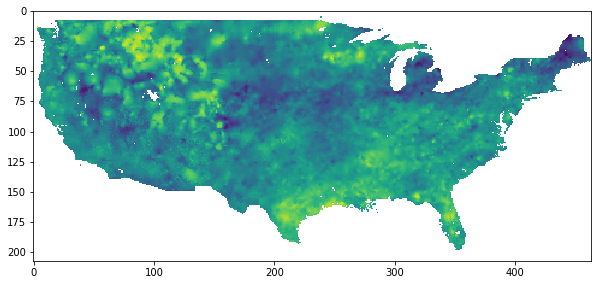

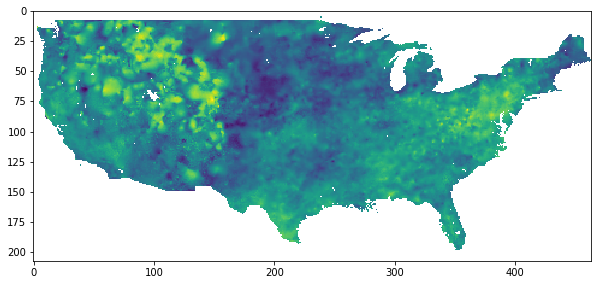

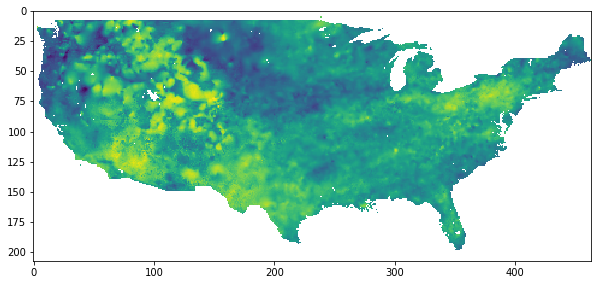

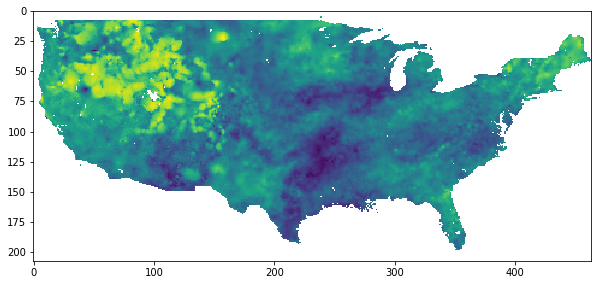

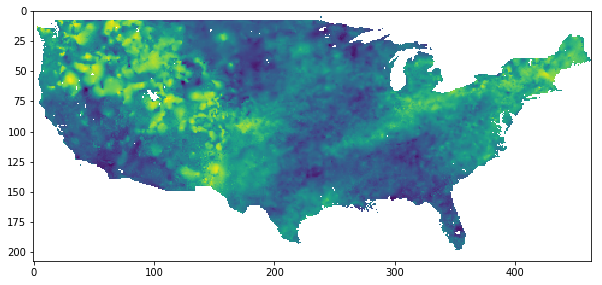

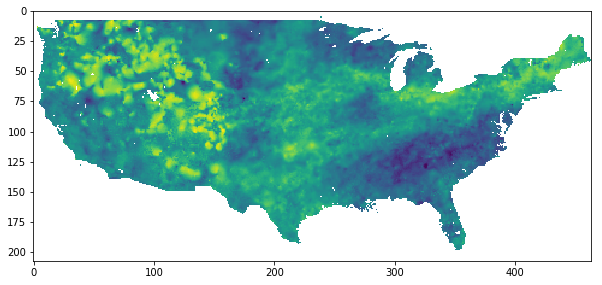

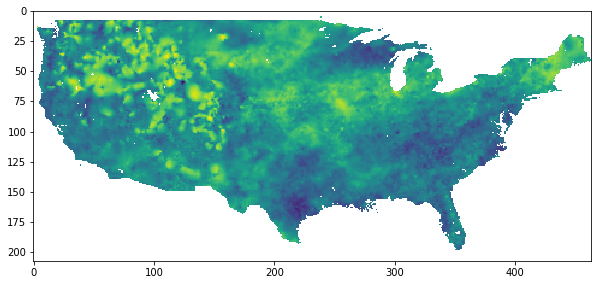

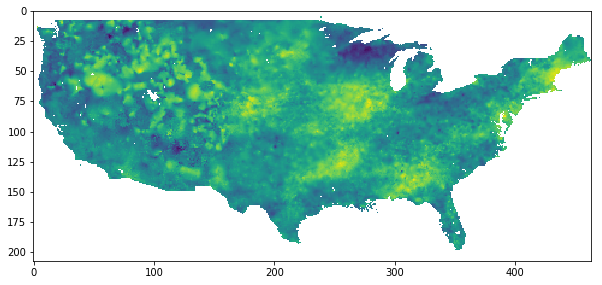

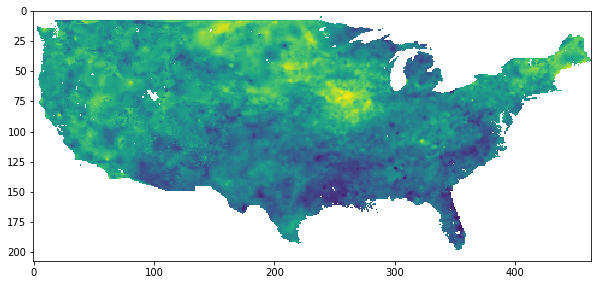

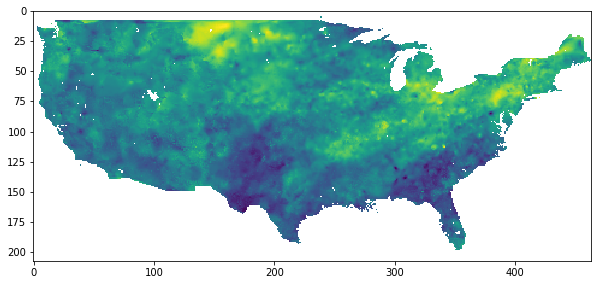

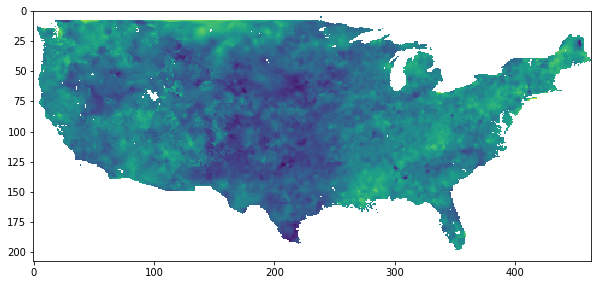

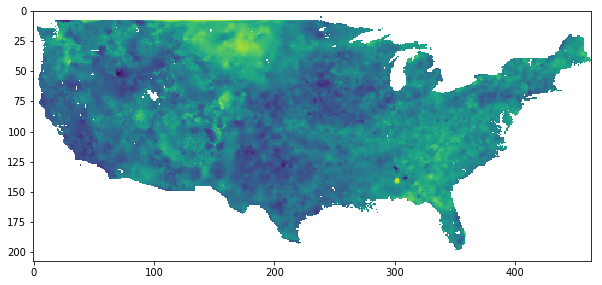

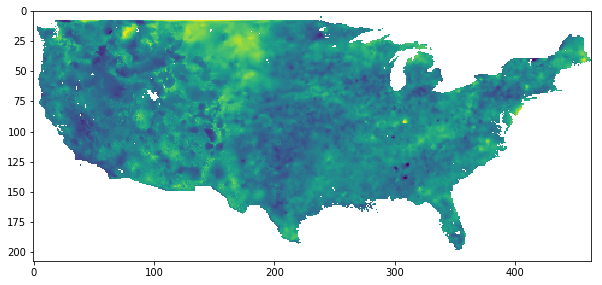

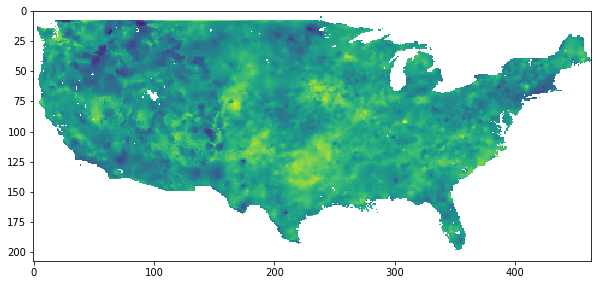

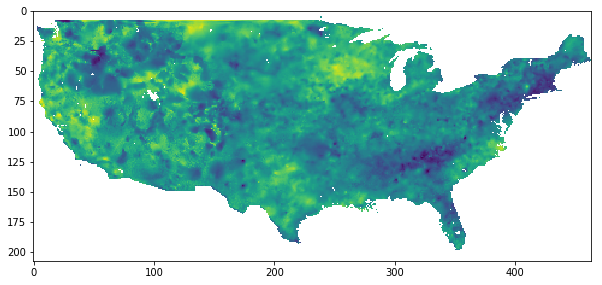

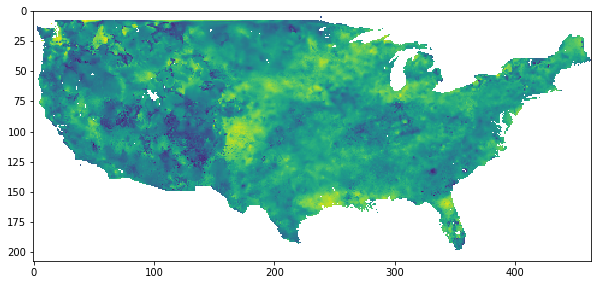

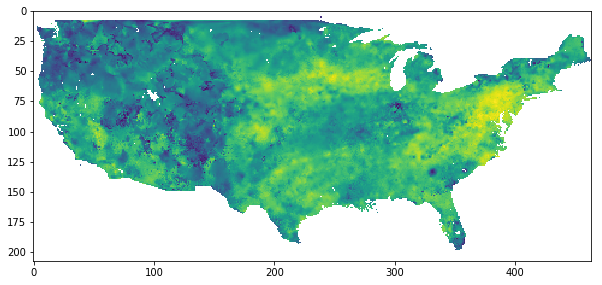

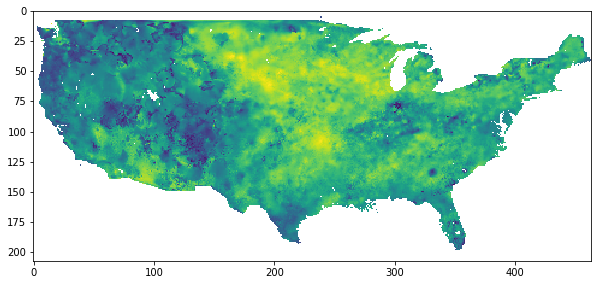

In [9]:
import matplotlib.pyplot as plt
fordri_month = fordri_arr[11::52,:,:]
fordri_month[np.isinf(fordri_month)] = np.nan
fordri_month[np.isneginf(fordri_month)] = np.nan
fordri_month[np.isinf(fordri_month)] = np.nan
fordri_month[fordri_month<-10000] = np.nan
for i in range(18):
    fig, axs = plt.subplots(figsize=(10, 5)) 
    axs.imshow(fordri_month[i,:,:])
    plt.show()

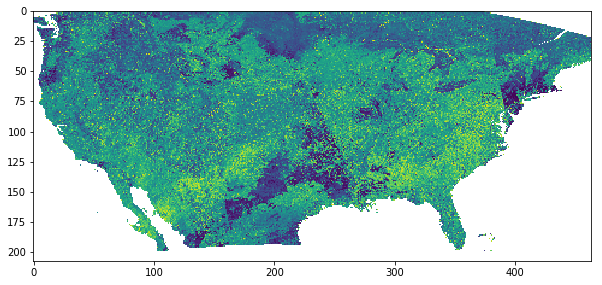

In [10]:
ndvi_14 = read_file(ndvi+"NDVI_202014.tif")
fig, axs = plt.subplots(figsize=(10, 5)) 
axs.imshow(ndvi_14)
plt.show()

In [12]:
np.nanmin(fordri_month)

-2.8899534

In [13]:
fordri_std_list = glob.glob(wdir+'STD_ForDRI/' + '*.tif')
fordri_std_list.sort()
fordri_mean_list = glob.glob(wdir+'MEAN_ForDRI/' + '*.tif')
fordri_mean_list.sort()

for i in range(0,52):
    arr_std = read_file(fordri_std_list[i])
    arr_mean = read_file(fordri_mean_list[i])
    for y in range(0,18):
        ds = fordri_list[i+y*52]
        fname = os.path.basename(ds)[4:]
        arr = read_file(ds)
        fordri = (arr-arr_mean)/arr_std
        outfordri = os.path.join(wdir+'ForDRI/' + fname)
        with rasterio.open(outfordri, 'w', **meta) as dst:
            dst.nodata = np.nan
            dst.write(fordri.astype(rasterio.float32), 1)
        print(fname)
        

ForDRI_200301.tif
ForDRI_200401.tif
ForDRI_200501.tif
ForDRI_200601.tif
ForDRI_200701.tif
ForDRI_200801.tif
ForDRI_200901.tif
ForDRI_201001.tif
ForDRI_201101.tif
ForDRI_201201.tif
ForDRI_201301.tif
ForDRI_201401.tif
ForDRI_201501.tif
ForDRI_201601.tif
ForDRI_201701.tif
ForDRI_201801.tif
ForDRI_201901.tif
ForDRI_202001.tif
ForDRI_200302.tif
ForDRI_200402.tif
ForDRI_200502.tif
ForDRI_200602.tif
ForDRI_200702.tif
ForDRI_200802.tif
ForDRI_200902.tif
ForDRI_201002.tif
ForDRI_201102.tif
ForDRI_201202.tif
ForDRI_201302.tif
ForDRI_201402.tif
ForDRI_201502.tif
ForDRI_201602.tif
ForDRI_201702.tif
ForDRI_201802.tif
ForDRI_201902.tif
ForDRI_202002.tif
ForDRI_200303.tif
ForDRI_200403.tif
ForDRI_200503.tif
ForDRI_200603.tif
ForDRI_200703.tif
ForDRI_200803.tif
ForDRI_200903.tif
ForDRI_201003.tif
ForDRI_201103.tif
ForDRI_201203.tif
ForDRI_201303.tif
ForDRI_201403.tif
ForDRI_201503.tif
ForDRI_201603.tif
ForDRI_201703.tif
ForDRI_201803.tif
ForDRI_201903.tif
ForDRI_202003.tif
ForDRI_200304.tif
ForDRI_200

ForDRI_201626.tif
ForDRI_201726.tif
ForDRI_201826.tif
ForDRI_201926.tif
ForDRI_202026.tif
ForDRI_200327.tif
ForDRI_200427.tif
ForDRI_200527.tif
ForDRI_200627.tif
ForDRI_200727.tif
ForDRI_200827.tif
ForDRI_200927.tif
ForDRI_201027.tif
ForDRI_201127.tif
ForDRI_201227.tif
ForDRI_201327.tif
ForDRI_201427.tif
ForDRI_201527.tif
ForDRI_201627.tif
ForDRI_201727.tif
ForDRI_201827.tif
ForDRI_201927.tif
ForDRI_202027.tif
ForDRI_200328.tif
ForDRI_200428.tif
ForDRI_200528.tif
ForDRI_200628.tif
ForDRI_200728.tif
ForDRI_200828.tif
ForDRI_200928.tif
ForDRI_201028.tif
ForDRI_201128.tif
ForDRI_201228.tif
ForDRI_201328.tif
ForDRI_201428.tif
ForDRI_201528.tif
ForDRI_201628.tif
ForDRI_201728.tif
ForDRI_201828.tif
ForDRI_201928.tif
ForDRI_202028.tif
ForDRI_200329.tif
ForDRI_200429.tif
ForDRI_200529.tif
ForDRI_200629.tif
ForDRI_200729.tif
ForDRI_200829.tif
ForDRI_200929.tif
ForDRI_201029.tif
ForDRI_201129.tif
ForDRI_201229.tif
ForDRI_201329.tif
ForDRI_201429.tif
ForDRI_201529.tif
ForDRI_201629.tif
ForDRI_201

ForDRI_201152.tif
ForDRI_201252.tif
ForDRI_201352.tif
ForDRI_201452.tif
ForDRI_201552.tif
ForDRI_201652.tif
ForDRI_201752.tif
ForDRI_201852.tif
ForDRI_201952.tif
ForDRI_202052.tif
